<a href="https://colab.research.google.com/github/AlejandroLopez105/Computacion3/blob/master/Multivariable%20optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computación III -Unidad I
+ Autor : Miguel Alejandro López Olvera
+ Contacto: alexander_105@live.com 
+ 05-10-2020

#Optimización en una dimensión
+ Búsqueda exhaustiva
+ Método de Newton 
+ Método de la sección aurea 



#Clase Optimización 
+ Búsqueda exhaustiva
+ Método de Newton
+ Método de la sección aurea


In [70]:
class Optimization:
    def __init__(self, func, tol, maxIter):
        self.tol = tol
        self.maxIter = maxIter
        self.func = func

    def Exhaustive_search(self, inicio, fin):
        x_a = np.arange(inicio, fin + 1)
        y_a = np.zeros(len(x_a))
        y_a_muestreo = np.zeros(9)
        max = -99999999
        min = 999999999
        index_min = 0
        index_max = 0
        for i in x_a:
            y_a[i] = self.func.subs(x, x_a[i])
            a = 0.1
            if (y_a[i] < min):
                min = y_a[i]
                index_min = x_a[i]
            for j in range(9):
                subs = x_a[i] + a
                y_a_muestreo[j] = self.func.subs(x, subs)
                if (y_a_muestreo[j] > max):
                    max = y_a_muestreo[j]
                    index_max = subs
                if (y_a_muestreo[j] < min):
                    min = y_a_muestreo[j]
                    index_min = subs
                a += 0.1
        return min, max, index_min, index_max

    def Newton_method(self, der1, der2, variable):
        # valor inicial
        x_1 = float(1)
        # inicializar error (delta)
        error = 99999  # valor inicial para el error, se actualizará en el ciclo
        count = 0
        while self.tol < error and count < self.maxIter:
            # Xk1 = xk - eval(f'(xf))/eval(f''(xk))
            x_2 = x_1 - (der1.subs(variable, x_1) / der2.subs(variable, x_1))
            # error = abs(actual-anterior)
            error = abs(x_1 - x_2)
            # count += 1
            count += 1
            # xk =Xk1
            x_1 = x_2
        return x_1

    def Golden_ratio_method(self, f, x_l, x_u, variable):
        prop = (float(sqrt(5)) - 1) / 2
        conteo = 0
        while (abs(x_u - x_l) > self.tol and conteo < self.maxIter):
            d = prop * (x_u - x_l)
            x_1 = x_l + d
            x_2 = x_u - d
            eval_x1 = f.subs(variable, x_1)
            eval_x2 = f.subs(variable, x_2)

            if (eval_x1 < eval_x2):
                x_l = x_2
                x_2 = x_1
                x_1 = x_l + (prop * (x_u - x_l))
            elif (eval_x2 < eval_x1):
                x_u = x_1
                x_1 = x_2
                x_2 = x_u - (prop * (x_u - x_l))
            conteo += 1
        return x_1

    def soloGradiente(self, f, a, b):
        # Primer derivada parcial con respecto de x
        derx = diff(f, x)
        # Primer derivdad parcial con respecto de y
        dery = diff(f, y)
        # Sustitución
        i = derx.subs([(x, a), (y, b)])
        j = dery.subs([(x, a), (y, b)])
        grad = np.array([i, j], dtype='float')
        x_h = a + i * (h)
        y_h = b + j * (h)
        # sustituyendo x por x_h
        g_h = f.subs([(x, x_h), (y, y_h)])
        g_prime_h = float(sqrt((i * i) + (j * j)))

        return grad,g_h,g_prime_h

    def Hessiana(self, f, a, b):
        # Hess = float(np.zeros((2,2)))
        elevacion = f.subs([(x, a), (y, b)])
        # Primer derivada parcial con respecto de x
        derx = diff(f, x)
        # Segeunda derivada parcial con respecto de x
        der2x = diff(derx, x)
        der2x_subs = der2x.subs([(x, a), (y, b)])
        # Primer derivdad parcial con respecto de y
        dery = diff(f, y)
        # Segunda derivada parcial con respecto de y
        der2y = diff(dery, y)
        der2y_subs = der2y.subs([(x, a), (y, b)])

        # Segunda derivada con respecto de x y y
        derxy = diff(f, x, y)
        derxy_subs = derxy.subs([(x, a), (y, b)])
        # Hessiana
        # Hess = der2x*der2y - (derxy*derxy)
        # det_Hess = Hess.subs([(x,a), (y,b)])
        Hess = np.array([[der2x_subs, derxy_subs], [derxy_subs, der2y_subs]], dtype='float')
        det_Hess = der2x * der2y - (derxy * derxy)
        det_Hess_subs = det_Hess.subs([(x, a), (y, b)])
        return Hess, det_Hess_subs

    def inv_Hess(self, Hess):
        invHess = np.linalg.inv(Hess)
        return invHess

    def ascensoPronunciado(self, f2, a, b, tol):
        f2derx = diff(f2, x)
        f2dery = diff(f2, y)

        # gradiente y hessiana
        grad,g_h,g_prime = self.soloGradiente(f2, a, b)
        g_h_prime = diff(g_h, h)
        g_h_dprime = diff(g_h_prime, h)
        a1 = 0
        b1 = 0
        while (g_prime > tol):
        #for r in range(10):
            a1 = 0
            b1 = 0
            hMax = self.Newton_method(g_h_prime, g_h_dprime, "h")
            a1 = a + (f2derx.subs([(x, a), (y, b)])) * hMax
            b1 = b + (f2dery.subs([(x, a), (y, b)]) * hMax)

            grad,g_h,g_prime = self.soloGradiente(f2, a1, b1)
            Hess, det_Hess = self.Hessiana(f2, a1, b1)
            g_h_prime = diff(g_h, h)
            g_h_dprime = diff(g_h_prime)
            a = a1
            b = b1

        z_value = float(f2.subs([(x, a1), (y, b1)]))
        f2Dderx = diff(f2derx, x)
        evalDderx = f2Dderx.subs([(x, a), (y, b)])
        if (det_Hess > 0 and evalDderx > 0):
            point_type = "Steep ascent minimum "
        elif (det_Hess > 0 and evalDderx < 0):
            point_type = "Steep ascent maximum "
        else:
            point_type = "Steep ascent saddle point"

        point = np.array([a1, b1, z_value], dtype="float")
        return point, point_type

    def multidimentionalNewton(self, f2, x0, tol):
        grad,g_h,g_prime = self.soloGradiente(f2, x0[0], x0[1])
        Hess, det_Hess = self.Hessiana(f2, x0[0], x0[1])
        invHess = self.inv_Hess(Hess)
        xk = np.zeros(2,dtype="float")
        count = 1
        if (det_Hess == 0):
            print("La matriz es no singular")
        else:
            while (abs(sqrt(((x0[0] - xk[0]) ** 2) + ((x0[1] - xk[1]) ** 2))) > tol):
                xk = np.zeros(2)
                xk = x0 - (np.dot(invHess, grad))
                x0 = xk
                grad,g_h,g_prime = self.soloGradiente(f2, x0[0], x0[1])
                Hess, det_Hess = self.Hessiana(f2, x0[0], x0[1])
                invHess = self.inv_Hess(Hess)
                count += 1
        z_value = float(f2.subs([(x, xk[0]), (y, xk[1])]))
        f2derx = diff(f2, x)
        f2Dderx = diff(f2derx, x)
        evalDderx = f2Dderx.subs([(x, x0[0]), (y, x0[1])])
        if (det_Hess > 0 and evalDderx > 0):
            point_type = "Newton minimum"
        elif (det_Hess > 0 and evalDderx < 0):
            point_type = "Newton maximum"
        else:
            point_type = "Newton saddle point"
        point = np.array([xk[0], xk[1], z_value], dtype='float')
        return point, point_type


#Graficación de métodos y puntos


In [71]:

class Graph:
    def __init__(self, func):
        self.func = func

    def PlotFunction(self, inicio, fin):
        x_a = np.linspace(-1, 2.5, 10000)
        y_a = np.zeros(len(x_a))

        for i in range(len(x_a)):
            y_a[i] = self.func.subs(x, x_a[i])
        plt.title("Búsqueda Exhaustiva")
        plt.xlabel("Variable independiente")
        plt.ylabel("Variable dependiente")
        # Generar gráfico usando x_a y y_a
        plt.plot(x_a, y_a, label=self.func)
        # Desplegar lyenda
        plt.legend(loc='best')

    def plotPoint(self, x, y, legend, color, mark):
        plt.scatter(x, y, label=legend, c=color, marker=mark)
        plt.legend(loc="best")

    def saveFigure(self, title, quality):
        plt.savefig(title, dpi=quality, bbox_inches='tight')

    def evalFunction(self, x, y):
        #Z = 2 * x * y + 2 * x - x ** 2 - 2 * y ** 2
        Z = x**2+y**2+2*x+4
        return Z

    def crearGrafico3D(self):
        return plt.axes(projection='3d')

    # Función para desplegar un punto o puntos en 3D (scatter)
    def plot3DPoint(self, x, y, z, l, color,mark,ax):
        # fig = plt.figure()
        # ax = plt.axes(projection='3d')
        ax.scatter(x, y, z, label=l,c = color, marker=mark)
        ax.legend(loc="best")

    def crearGrafico3D(self):
        return plt.axes(projection='3d')

    # Metodo para graficar una superficie de tres dimensiones
    def plotSurface(self, f, inicioX, finX, inicioY, finY, ax):
        # Generara valores para cada eje
        X = np.linspace(inicioX, finX, 100)
        Y = np.linspace(inicioY, finY, 100)

        # Generar un grid (matriz)
        X, Y = np.meshgrid(X, Y)
        print("Len(X)", len(X), " Len(X[0])", len(X[0]))

        Z = self.evalFunction(X, Y)

        # Generar gráfico en matplotlib
        # fig = plt.figure()

        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')

        ax.set_title("Multidimentional Optimization")
        # ax.set_title("Function: " + str(f));
        plt.show()



#Definición de método Main

Optimal steep ascent method run time: 0.00517
Steep ascent minimum 
[-1.  0.  3.]
Multivariable Newton method run time: 0.00628
Newton minimum
[-1.  0.  3.]
Len(X) 100  Len(X[0]) 100


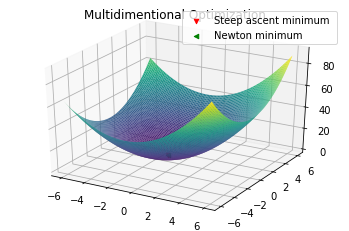

In [72]:

from numpy import matrix
from sympy import *
import matplotlib.pyplot as plt
from sympy.abc import x, y, h, z
import numpy as np
import matplotlib
from time import time
import matplotlib.pyplot as plt

# habilitar impresión avanzada con latex
init_printing(use_unicode=True)


def main():
    func = x ** 4 - 3 * x ** 3 + 2 * x
    # func=x**2 + 2*x
    tol = 0.0001
    maxIter = 1000
    inicio = -100
    fin = 100

    der1 = diff(func)
    der2 = diff(der1)

    objOpt = Optimization(func, tol, maxIter)

    start_time_ES = time()
    min, max, index_min, index_max = objOpt.Exhaustive_search(inicio, fin)
    time_ES = time() - start_time_ES

    start_Newton = time()
    x_1_newton = objOpt.Newton_method(der1, der2, "x")
    time_Newton = time() - start_Newton

    start_Golden = time()
    x_1_golden = objOpt.Golden_ratio_method(func, inicio, fin, "x")
    time_Golden_ratio = time() - start_Golden

    """print("Exhaustive search: " + str(index_min))
    print("\t Time: " + str(time_ES) + "\n")
    print("Newton method: " + str(x_1_newton))
    print("\t Time: " + str(time_Newton) + "\n")
    print("Golden search method: " + str(x_1_golden))
    print("\t Time: " + str(time_Golden_ratio) + "\n")"""

    objGraph = Graph(func)
    """objGraph.PlotFunction(inicio,fin)
  
    minOrMax_Newton = der2.subs(x,x_1_newton)
    minOrMax_Golden = der2.subs(x,x_1_golden)
  
    if(der1.subs(x,index_min) < tol):#almost 0
      objGraph.plotPoint(index_min, min, "Minimum-Exhaustive Search", "b", ">")
    elif(der1.subs(x,index_max) < tol):#almost 0
      objGraph.plotPoint(index_max, max, "Maximum-Exhaustive Search", "b",">")
  
    if(minOrMax_Newton > 0):
      objGraph.plotPoint(x_1_newton, func.subs(x,x_1_newton), "Minimum-Newton", "r","v")
    elif(minOrMax_Newton < 0):
      objGraph.plotPoint(x_1_newton, func.subs(x,x_1_newton), "Maximum-Newton", "r","v")
  
    if(minOrMax_Golden > 0):
      objGraph.plotPoint(x_1_golden, func.subs(x,x_1_golden), "Minimum-Golden Search", "g","<")
    elif(minOrMax_Golden < 0):
      objGraph.plotPoint(x_1_golden, func.subs(x,x_1_golden), "Maximum-Golden Search", "g","<")
  
    #objGraph.saveFigure("Optimization",300)"""

    ##############################Optimización multidimensional####################################
    ###############################################################################################
    ############################## Ascenso pronunciado óptimo #####################################
    #f2 = 2 * x * y + 2 * x - x ** 2 - 2 * y ** 2
    f2 = x**2+y**2+2*x+4
    x0 = np.array([-1, 1], dtype='float')
    start_APO = time()
    point_APO, point_type_APO = objOpt.ascensoPronunciado(f2, x0[0], x0[1], tol)
    APO_Time = time() - start_APO
    print("Optimal steep ascent method run time: " + str("{:.5f}".format(APO_Time)))
    print(str(point_type_APO))
    print(str(point_APO))
    ################################## Newton Multivariable  ######################################
    inicio_Newton_Mult = time()
    point_Newton, Mult_New_Type = objOpt.multidimentionalNewton(f2, x0, tol)
    Newton_Mult_Time = time() - inicio_Newton_Mult
    print("Multivariable Newton method run time: " + str("{:.5f}".format(Newton_Mult_Time)))
    print(str(Mult_New_Type))
    print(str(point_Newton))

    # Comenzando a graficar en 3D
    ax = objGraph.crearGrafico3D()
    objGraph.plot3DPoint(point_APO[0], point_APO[1], point_APO[2], point_type_APO, "r","v", ax)
    objGraph.plot3DPoint(point_Newton[0], point_Newton[1], point_Newton[2], Mult_New_Type, "g","<", ax)
    objGraph.plotSurface(f2, -6, 6, -6, 6, ax)
    #objGraph.saveFigure("APO", 300)


if __name__ == "__main__":
    main()